In [2]:
! pip install --upgrade --user hmmlearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/123.6 kB ? eta -:--:--
     --------- ------------------------------ 30.7/123.6 kB ? eta -:--:--
     ------------------------- ------------- 81.9/123.6 kB 1.2 MB/s eta 0:00:01
     --------------------------- --------- 92.2/123.6 kB 751.6 kB/s eta 0:00:01
     --------------------------- --------- 92.2/123.6 kB 751.6 kB/s eta 0:00:01
     --------------------------- --------- 92.2/123.6 kB 751.6 kB/s eta 0:00:01
     --------------------------- --------- 92.2/123.6 kB 751.6 kB/s eta 0:00:01
     --------------------------- --------- 92.2/123.6 kB 751.6 kB/s eta 0:00:01
     ------------------------------------ 123.6/123.6 kB 363.4 kB/s eta 0:00:00


In [1]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Task: 3

In [2]:
rolls = np.load('rolls.npy')

In [3]:
print(rolls.shape)
np.unique(rolls)

(50000, 1)


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [4]:
train_size = len(rolls) // 2
train_rolls = rolls[:train_size]
valid_rolls = rolls[train_size:]

# train_rolls, valid_rolls = train_test_split(rolls, train_size=0.5, random_state=13)

## 3.4.2.1

In [5]:
best_model = None
best_score = float('-inf')
best_emission = None

np.random.seed(13)

In [6]:
scores = []
for emission_prob in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    fair_die = [1.0 / 6] * 6
    loaded_die = [(1 - emission_prob) / 5.0] * 5 + [emission_prob]

    model = hmm.CategoricalHMM(n_components=2, random_state=13, init_params='t')
    model.startprob_ = np.array([1.0, 0.0])
    # model.transmat_ = np.array([[0.95, 0.05], [0.1, 0.9]])
    model.emissionprob_ = np.array([fair_die, loaded_die])

    model.fit(train_rolls.reshape(-1, 1))
    score = model.score(valid_rolls.reshape(-1, 1))
    scores.append((score, emission_prob))
    if score > best_score:
        best_score = score
        best_model = model
        best_emission = emission_prob

In [7]:
scores

[(-43182.6171208121, 0.1),
 (-43182.522553404095, 0.2),
 (-43182.98803541327, 0.3),
 (-43179.95911429952, 0.4),
 (-43170.24957402426, 0.5),
 (-43151.91963776425, 0.6),
 (-43126.86141626598, 0.7),
 (-43105.21814936231, 0.8),
 (-43099.5968379939, 0.9)]

In [8]:
print(f"Best Model Emission Probability for Loaded Die: {best_emission}")
print(f"Validation Set Log-Likelihood Score: {best_score}")

Best Model Emission Probability for Loaded Die: 0.9
Validation Set Log-Likelihood Score: -43099.5968379939


## 3.4.2.2 & 3.4.2.3

[0 1 0 ... 0 0 1]


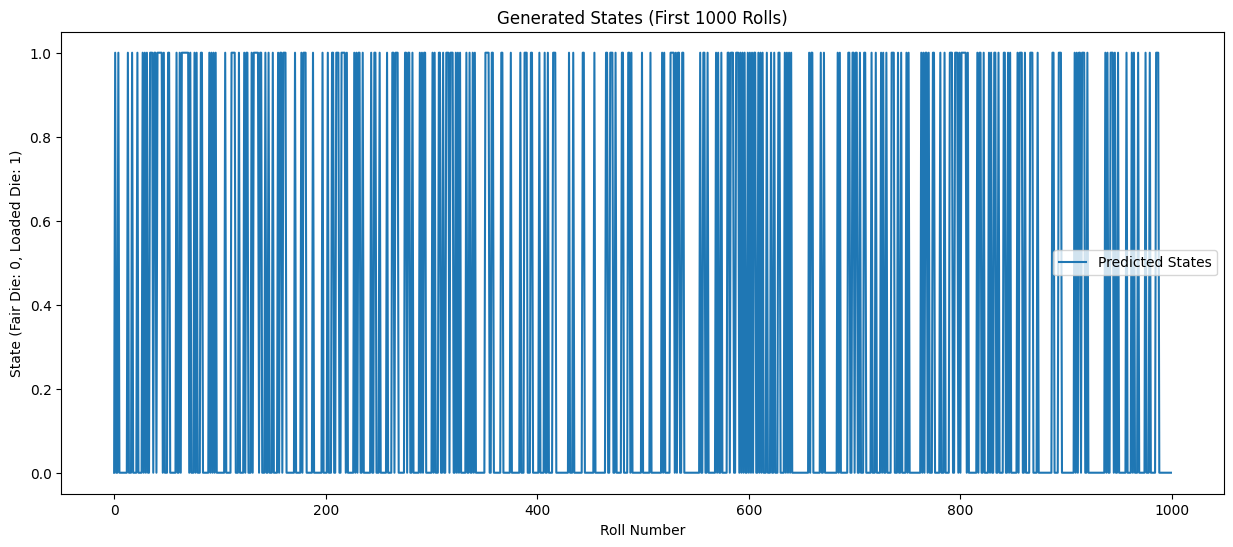

In [9]:
# most likely sequence of hidden states

sequence = best_model.predict(valid_rolls.reshape(-1, 1))
print(sequence)

plt.figure(figsize=(15, 6))
plt.plot(sequence[:1000], label='Predicted States')
plt.title('Generated States (First 1000 Rolls)')
plt.xlabel('Roll Number')
plt.ylabel('State (Fair Die: 0, Loaded Die: 1)')
plt.legend()
plt.show()

## 3.4.2.4

The problem of identifying the most likely sequence of switching between the fair and loaded die corresponds to the **"Decoding Problem"** in Hidden Markov Models. This problem involves determining the most likely sequence of hidden states given observed data, which in this case, is identifying the sequence of fair and loaded die rolls based on the observed sequence of dice rolls.

## 3.4.3.1

In [11]:
sequence = best_model.predict(valid_rolls.reshape(-1, 1))

transitions = 0
for i in range(len(sequence) - 1):
    if sequence[i] == 0 and sequence[i + 1] == 1:
        transitions += 1

print("Number of transitions from fair dice to loaded dice:", transitions)
print("Number of times fair dice was used:", len(sequence) - sum(sequence))
print("Probability of switching from fair dice to loaded dice:", transitions / (len(sequence) - sum(sequence)))

transitions = 0
for i in range(len(sequence) - 1):
    if sequence[i] == 1 and sequence[i + 1] == 0:
        transitions += 1

print("Number of transitions from loaded dice to fair dice:", transitions)
print("Number of times loaded dice was used: ", sum(sequence))
print("Probability of switching from loaded dice to fair dice:", transitions / sum(sequence))

Number of transitions from fair dice to loaded dice: 4945
Number of times fair dice was used: 17180
Probability of switching from fair dice to loaded dice: 0.28783469150174623
Number of transitions from loaded dice to fair dice: 4944
Number of times loaded dice was used:  7820
Probability of switching from loaded dice to fair dice: 0.6322250639386189


In [12]:
transition_matrix = best_model.transmat_
print(transition_matrix)

fair_to_loaded_prob = transition_matrix[0, 1] 
loaded_to_fair_prob = transition_matrix[1, 0]

print(f"Probability of switching from fair to loaded die: {fair_to_loaded_prob}")
print(f"Probability of switching from loaded to fair die: {loaded_to_fair_prob}")

[[0.69091688 0.30908312]
 [0.54828826 0.45171174]]
Probability of switching from fair to loaded die: 0.30908311596624544
Probability of switching from loaded to fair die: 0.5482882625845803


## 3.4.3.2

This task aligns with the estimation of transition probabilities between hidden states (an unknown parameter) in Hidden Markov Models. This is a **"Learning Problem"** in Hidden Markov Models. Specifically, it corresponds to estimating and understanding the transition dynamics between hidden states (fair die and loaded die) based on observed data sequences. The problem involves inferring the underlying state transitions (switching between fair and loaded dice) given the observed outcomes (rolls) using the principles of HMMs.


## 3.4.4.1

In [13]:
emission_probs_loaded = best_model.emissionprob_[1]
print("Emission Probabilities for the Loaded Die:")
print(emission_probs_loaded)

Emission Probabilities for the Loaded Die:
[0.04915447 0.04995925 0.04814033 0.04912401 0.04958487 0.75403707]


## 3.4.4.2

This task corresponds to estimating and analyzing emission probabilities in Hidden Markov Models. The emission probability are given but since they are kept trainable, the emission probabilites are learned according the sequence of observation given. Therefore, this task aligns with the **"Learning Problem"** in Hidden Markov Model. 

In [9]:
print(best_model.startprob_)

[1. 0.]


# Task : 3.5

In [11]:
runs_sequence = np.load('runs.npy')
print(runs_sequence.flatten())

[1 6 4 ... 1 6 3]


In [12]:
model = hmm.CategoricalHMM(n_components=2, n_iter=100, init_params='s')

# given the strikes approximately chance 30% of the times we set the transition matrix accordingly
model.transmat_ = [[0.7, 0.3], [0.3, 0.7]]
# given the probability of runs scored by different batsman we set the emission probabilities accordingly
model.emissionprob_ = [[0.15, 0.3, 0.3, 0.05, 0.1, 0.0, 0.1], [0.15, 0.1, 0.1, 0.05, 0.3, 0.0, 0.3]]
model.fit(runs_sequence)

transition_matrix = model.transmat_  
emission_probs = model.emissionprob_
start_probs = model.startprob_  

predicted_states = model.predict(runs_sequence)

first_ball_player = 'Virat' if predicted_states[0] == 0 else 'Rohit'
last_ball_player = 'Virat' if predicted_states[-1] == 0 else 'Rohit'

print(f"Transition Probabilities (Fair -> Loaded):\n{transition_matrix}")
print(f"Emission Probabilities:\n{emission_probs}")
print(f"Start Probabilities:\n{start_probs}")
print(f"Predicted First Ball Player: {first_ball_player}")
print(f"Predicted Last Ball Player: {last_ball_player}")

Transition Probabilities (Fair -> Loaded):
[[0.66830462 0.33169538]
 [0.29258031 0.70741969]]
Emission Probabilities:
[[0.15743236 0.31221932 0.26068312 0.04456992 0.13167229 0.
  0.09342298]
 [0.09695339 0.10175495 0.10317622 0.05127691 0.36147619 0.
  0.28536234]]
Start Probabilities:
[1.00000000e+00 1.64868519e-12]
Predicted First Ball Player: Virat
Predicted Last Ball Player: Rohit
